## Section 1 : Project

이덕재님은 게임 회사의 데이터 팀에 합류했습니다.

- 다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

## Data Description

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

## Keywords (참조용)

- Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
- Sprint 2 : Hypothesis Test, CI, Bayesian
- Sprint 3 : DR, PCA, Cluster

## 반드시 들어가야 하는 내용.

 - 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
 - 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
 - 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
 - 위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import chisquare  
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('C:/python/codestates/vgames2.csv')
df = data.copy()   # 원본 보호를 위한 복사본
df.rename(columns={'Unnamed: 0' : 'index'}, inplace= True)
df = df.drop(['index'], axis = 'columns')
#df

In [3]:
df1 = data.copy()   # 복사본 (임시)

In [4]:
# df.dtypes  # 데이터 타입 확인
# df.isnull().sum()  # 결측치 확인 

In [5]:
# df['Platform'].value_counts()   # 행 별로 데이터 확인
# df['Year'].value_counts()
# df['Genre'].value_counts()
# df['Publisher'].value_counts()
# df['NA_Sales'].value_counts()
# df['EU_Sales'].value_counts()

In [6]:
"""
# 년도 2자리 수 정상 년도로 변경
i = 0
for i in range(1, len(df['Name'])):
    if df['Year'][i] < 100:
        if df['Year'][i] > 80 :
            df['Year'][i] = df['Year'][i] + 1900
        else:
            df['Year'][i] = df['Year'][i] + 2000
    else:
        df['Year'][i]

# 경고는 데이터프레임 일부 변경에 대한 것이므로 무시해도 무방하다.
"""

"\n# 년도 2자리 수 정상 년도로 변경\ni = 0\nfor i in range(1, len(df['Name'])):\n    if df['Year'][i] < 100:\n        if df['Year'][i] > 80 :\n            df['Year'][i] = df['Year'][i] + 1900\n        else:\n            df['Year'][i] = df['Year'][i] + 2000\n    else:\n        df['Year'][i]\n\n# 경고는 데이터프레임 일부 변경에 대한 것이므로 무시해도 무방하다.\n"

In [7]:
# 년도 2자리 수 정상 년도로 변경
i = 0
for i in range(1, len(df['Name'])):
    if df.iloc[i,2] < 100:
        if df.iloc[i,2] > 80 :
            df.iloc[i,2] = df.iloc[i,2] + 1900
        else:
            df.iloc[i,2] = df.iloc[i,2] + 2000
    else:
        df.iloc[i,2]

In [8]:
# Sales 데이터의 K 와 M 의 단위를 M 으로 맞춰줌 

df['NA_Sales'] = df['NA_Sales'].str.replace('K','/1000', regex=True)
df['NA_Sales'] = df['NA_Sales'].str.replace('M','/1', regex=True)
df['EU_Sales'] = df['EU_Sales'].str.replace('K','/1000', regex=True)
df['EU_Sales'] = df['EU_Sales'].str.replace('M','/1', regex=True)
df['JP_Sales'] = df['JP_Sales'].str.replace('K','/1000', regex=True)
df['JP_Sales'] = df['JP_Sales'].str.replace('M','/1', regex=True)
df['Other_Sales'] = df['Other_Sales'].str.replace('K','/1000', regex=True)
df['Other_Sales'] = df['Other_Sales'].str.replace('M','/1', regex=True)

def divid(obj):
    try:
        dv1 = float(obj.split('/')[0]) / float(obj.split('/')[1])
        return dv1
    except:
        return float(obj)

df['NA_Sales'] = df['NA_Sales'].apply(divid)
df['EU_Sales'] = df['EU_Sales'].apply(divid)
df['JP_Sales'] = df['JP_Sales'].apply(divid)
df['Other_Sales'] = df['Other_Sales'].apply(divid)

In [9]:
df = df.dropna(axis=0)  # 결측값행 제거

In [10]:
df.iloc[:,2] = df.iloc[:,2].astype(int) # 년도 int로 변경

In [11]:
df.reset_index(drop=True)   # 인덱스 번호 리셋 (후 구 index 삭제)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [12]:
# df.to_csv("./df.csv")  # 파일 내보내기

---
## 전처리 완료  

---

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int32  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 1.2+ MB


In [14]:
# 연도별 / 지역별 판매량
year_sales = df.groupby(['Year']).sum()
year_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.13,0.64,0.00,0.11
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70


In [15]:
# 연도별 / 지역별 판매량 누적
year_sales_cumsum = year_sales.cumsum(axis=0)
year_sales_cumsum.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.13,0.64,0.00,0.11
1981,43.53,2.60,0.00,0.43
1982,70.45,4.25,0.00,0.74
1983,78.21,5.05,8.10,0.88
1984,111.49,7.15,22.37,1.58


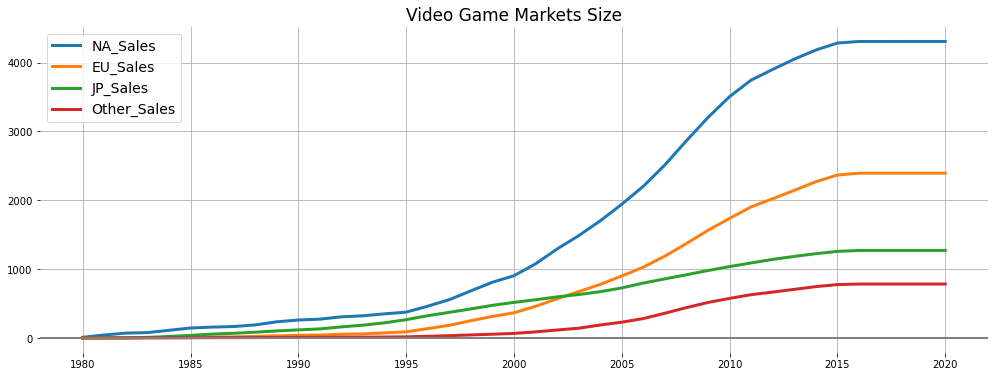

In [16]:
# 연도별 / 지역별 누적 판매량 그래프 ( 시장 규모 )

fig = plt.figure(figsize=(17,6)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(year_sales_cumsum['NA_Sales'], linewidth=3 , label='NA_Sales') ## 선그래프 생성 
ax.plot(year_sales_cumsum['EU_Sales'], linewidth=3 , label='EU_Sales') ## 선그래프 생성 
ax.plot(year_sales_cumsum['JP_Sales'], linewidth=3 , label='JP_Sales') ## 선그래프 생성 
ax.plot(year_sales_cumsum['Other_Sales'], linewidth=3 , label='Other_Sales') ## 선그래프 생성 
plt.legend(fontsize=14)   # 범례 표시

 
plt.title("Video Game Markets Size",fontsize=17) ## 타이틀 설정

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

# plt.text(*, 1, 'asdfas')

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)

plt.show()

In [17]:
# 북미는 전통적으로 게임시장의 규모가 컸으며, 2000년대를 들어서며 급격히 증가해 오고 있다.
# EU는 2000년대 들어서며 게임시장의 규모가 일본시장을 넘어섰다. 그 규모가 상당히 크다.
# 일본은의 게임시장은 90년대 중반에는 북미와 규모가 비슷했지만, 현재 시장 성장이 더디다.

In [18]:
# 전체 판매량에 대한 플랫폼 점유율 (판매량 기준) 상위 10개
platform_sales = df.groupby(['Platform']).sum()
platform_sales.drop('Year' ,axis=1)   # Year 행 삭제
plf1 = pd.DataFrame(platform_sales.sum(axis=1))   # 행들의 합 (axis=1) 후 df 화
plf1.columns = ['Sum']    # 컬럼명 Sum 으로 변경
plf1 = plf1.sort_values(by=['Sum'], axis=0, ascending=False)   # sum값 기준 내림차순 (ascending=False)
plf1.head(10)

,Sum
Platform,
DS,4272254.19
PS2,4252933.44
PS3,2613003.74
Wii,2580412.15
X360,2475132.59
PSP,2396701.84
PS,2368356.16
PC,1878447.95
XB,1601153.30


In [19]:
labels = plf1.index

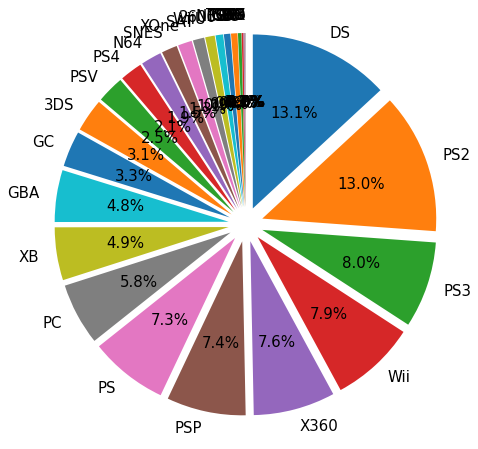

In [20]:
# 플랫폼 별 비중
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.figure(figsize=(8,8)).set_facecolor('white')   # 그래프 크기 , 배경 색
plt.rc('font', size=15)     # 폰트 사이즈
plt.pie(np.array(plf1).ravel(), labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode = explode);
plt.show();
# 상위 10개의 플랫폼이

In [21]:
# 상위 10개 플랫폼 차지 비중 : 79.8%
plf_top10 = plf1[0:10].sum()/plf1.sum()
plf_top10

Sum    0.797955
dtype: float64

In [22]:
# Nintendo DS, PS, Wii, Xbox 의  주요  플랫폼 차지 비중 : 64.3%
plf_top7 = plf1[0:7].sum()/plf1.sum()
plf_top7

Sum    0.64301
dtype: float64

In [23]:
# 데이터 분석용 데이터 프레임
df_box = pd.DataFrame()
df_box['Genre'] = df['Genre']
df_box['NA_Sales'] = df['NA_Sales']
df_box['EU_Sales'] = df['EU_Sales']
df_box['JP_Sales'] = df['JP_Sales']
df_box['Other_Sales'] = df['Other_Sales']
df_box = df_box.sort_values(by = 'Genre', axis=0, ascending = True)   # Genre 오름차순 정렬
df_box.reset_index(inplace = True)  # 젤 앞에 새로운 인덱스 넘버 부여
df_box = df_box.drop(['index'], axis = 'columns')   # 구 index 삭제
df_box

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.16,0.05,0.00,0.02
2,Action,0.00,0.08,0.00,0.02
3,Action,1.01,0.53,0.01,0.14
4,Action,0.04,0.03,0.00,0.00
...,...,...,...,...,...
16236,Strategy,0.00,0.04,0.00,0.01
16237,Strategy,0.01,0.04,0.00,0.01
16238,Strategy,0.00,0.02,0.00,0.01
16239,Strategy,0.00,0.03,0.00,0.01


In [24]:
# 이상치 제거 함수
def outliers_iqr(box_data):
    q1, q3 = np.percentile(box_data, [25,75])
    # 넘파이의 값을 퍼센트로 표시해주는 함수
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((box_data > upper_bound) | (box_data < lower_bound))

In [25]:
box1 = outliers_iqr(df_box['NA_Sales'])[0]    # 이상치 인텍스 넘버 추출
box2 = outliers_iqr(df_box['EU_Sales'])[0]
box3 = outliers_iqr(df_box['JP_Sales'])[0]
box4 = outliers_iqr(df_box['Other_Sales'])[0]

In [26]:
df_box.loc[box1, 'NA_Sales']   # 이상치 값 확인 (생략 가능)
df_box.loc[box1, 'EU_Sales']
df_box.loc[box1, 'JP_Sales']
df_box.loc[box1, 'Other_Sales']

3        0.14
19       0.13
23       0.13
25       0.37
34       0.43
         ... 
16184    0.59
16199    0.00
16203    0.00
16228    0.33
16231    0.12
Name: Other_Sales, Length: 1650, dtype: float64

In [27]:
# 이상치 갯수
lead_outlier_index = np.concatenate((box1, box2, box3, box4), axis = None)
print(len(lead_outlier_index))   
lead_outlier_index

7727


array([    3,    19,    23, ..., 16184, 16228, 16231], dtype=int64)

In [28]:
lead_not_outlier_index = []
for i in df_box.index:
    # lead_outlier_index에 포함되지 않는다면 추가
    if i not in lead_outlier_index :
        lead_not_outlier_index.append(i)

In [29]:
df_box_clean = df_box.loc[lead_not_outlier_index]
df_box_clean = df_box_clean.reset_index(drop=True)  # 이상치 제거 완료
df_box_clean   # 이상치 제거 완료

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.0,0.00
1,Action,0.16,0.05,0.0,0.02
2,Action,0.00,0.08,0.0,0.02
3,Action,0.04,0.03,0.0,0.00
4,Action,0.32,0.02,0.0,0.00
...,...,...,...,...,...
11727,Strategy,0.00,0.02,0.0,0.00
11728,Strategy,0.00,0.04,0.0,0.01
11729,Strategy,0.01,0.04,0.0,0.01
11730,Strategy,0.00,0.02,0.0,0.01


In [30]:
gen_name = pd.DataFrame(df_box_clean['Genre'].value_counts())  # Genre 카운드
gen_name = gen_name.reset_index()   # index 새로 지정 
ge = gen_name['index']   # index 추출

<Figure size 576x576 with 0 Axes>

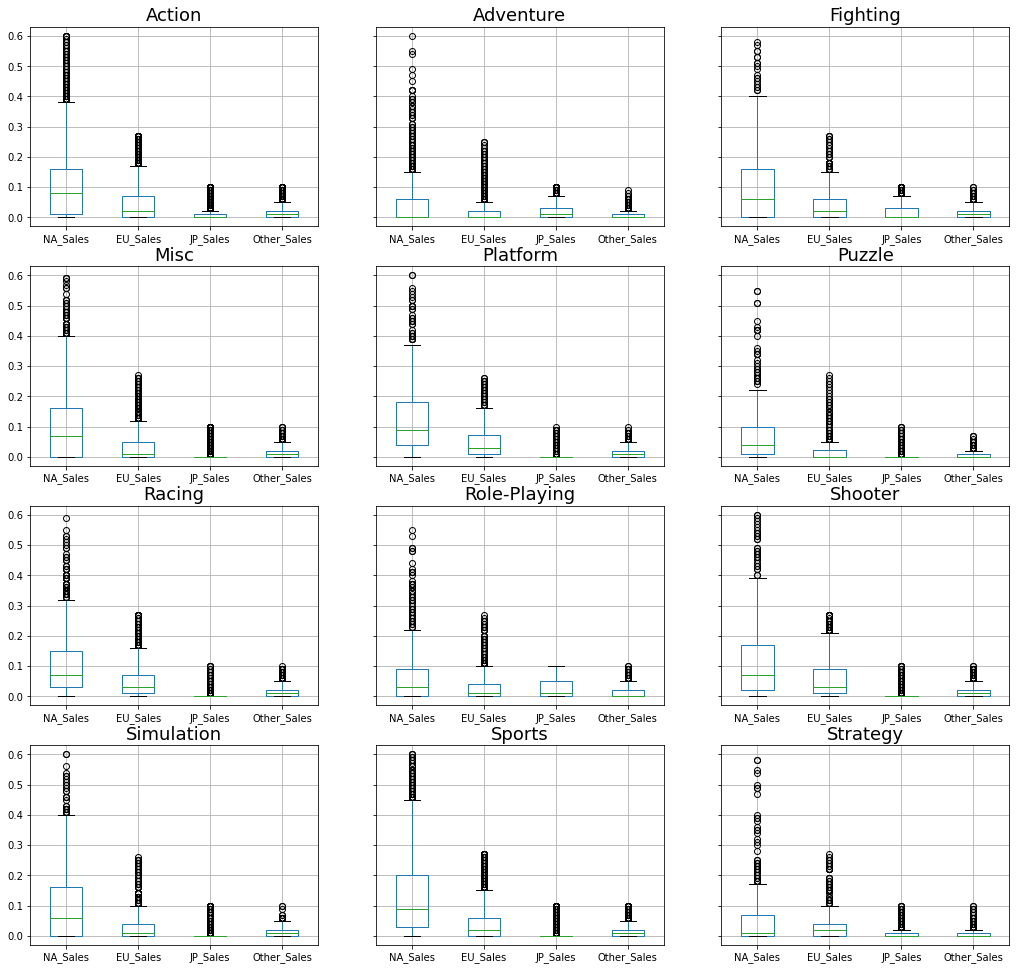

In [31]:
plt.figure(figsize=(8,8)).set_facecolor('white') 
df_box_clean.groupby('Genre').boxplot(column = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                           rot=0, fontsize=10, figsize=(17,17));

In [32]:
# ANOVA 분석 p-vlaue 확인
for i in range(0,12):
    gen = ge[i]
    na = df_box_clean[df_box_clean['Genre'] == gen]['NA_Sales']
    eu = df_box_clean[df_box_clean['Genre'] == gen]['EU_Sales']
    jp = df_box_clean[df_box_clean['Genre'] == gen]['JP_Sales']
    other = df_box_clean[df_box_clean['Genre'] == gen]['Other_Sales']
    # Action / Sales boxplot
    ANOVA_ac = stats.f_oneway(na, eu, jp, other)
    print(ge[i],' : ', ANOVA_ac[1])   # 각 pvalu 확인 : 0 이거나 0에 가까운 아주 작은 수

Action  :  0.0
Sports  :  0.0
Misc  :  1.6288578997174543e-305
Adventure  :  1.195943821656486e-74
Racing  :  4.8859316487973975e-267
Shooter  :  6.040243874247123e-239
Role-Playing  :  1.1491667729266598e-87
Simulation  :  1.6519818214809954e-149
Platform  :  1.768568900838653e-195
Fighting  :  9.934521027151865e-108
Strategy  :  3.0968890334190064e-45
Puzzle  :  4.703417586332283e-87


In [33]:
# NA 의 3분위수 비교
for i in range(0,12):
    gen = ge[i]
    na = df_box_clean[df_box_clean['Genre'] == gen]['NA_Sales']
#    eu = df_box_clean[df_box_clean['Genre'] == gen]['EU_Sales']
#    jp = df_box_clean[df_box_clean['Genre'] == gen]['JP_Sales']
#    other = df_box_clean[df_box_clean['Genre'] == gen]['Other_Sales']

    data = na
    min1 = np.percentile(data,0)      # 최소값
    q1 = np.percentile(data,25)      # 1사분위수
    q2 = np.percentile(data,50)      # 2사분위수
    q3 = np.percentile(data,75)      # 3사분위수
    max1 = np.percentile(data,100)  # 최대값
    
#    print(ge[i], min1, q1, q2, q3, max1)   
    print(ge[i],' : ', q3)   

Action  :  0.16
Sports  :  0.2
Misc  :  0.16
Adventure  :  0.06
Racing  :  0.15
Shooter  :  0.17
Role-Playing  :  0.09
Simulation  :  0.16
Platform  :  0.18
Fighting  :  0.16
Strategy  :  0.07
Puzzle  :  0.1


In [34]:
# EU 의 3분위수 비교
for i in range(0,12):
    gen = ge[i]
#    na = df_box_clean[df_box_clean['Genre'] == gen]['NA_Sales']
    eu = df_box_clean[df_box_clean['Genre'] == gen]['EU_Sales']
#    jp = df_box_clean[df_box_clean['Genre'] == gen]['JP_Sales']
#    other = df_box_clean[df_box_clean['Genre'] == gen]['Other_Sales']

    data = eu
    min1 = np.percentile(data,0)      # 최소값
    q1 = np.percentile(data,25)      # 1사분위수
    q2 = np.percentile(data,50)      # 2사분위수
    q3 = np.percentile(data,75)      # 3사분위수
    max1 = np.percentile(data,100)  # 최대값
    
#    print(ge[i], min1, q1, q2, q3, max1)   
    print(ge[i],' : ', q3)   

Action  :  0.07
Sports  :  0.06
Misc  :  0.05
Adventure  :  0.02
Racing  :  0.07
Shooter  :  0.09
Role-Playing  :  0.04
Simulation  :  0.04
Platform  :  0.07250000000000001
Fighting  :  0.06
Strategy  :  0.04
Puzzle  :  0.0225


In [35]:
# JP 의 3분위수 비교
for i in range(0,12):
    gen = ge[i]
#    na = df_box_clean[df_box_clean['Genre'] == gen]['NA_Sales']
#    eu = df_box_clean[df_box_clean['Genre'] == gen]['EU_Sales']
    jp = df_box_clean[df_box_clean['Genre'] == gen]['JP_Sales']
#    other = df_box_clean[df_box_clean['Genre'] == gen]['Other_Sales']

    data = jp
    min1 = np.percentile(data,0)      # 최소값
    q1 = np.percentile(data,25)      # 1사분위수
    q2 = np.percentile(data,50)      # 2사분위수
    q3 = np.percentile(data,75)      # 3사분위수
    max1 = np.percentile(data,100)  # 최대값
    
#    print(ge[i], min1, q1, q2, q3, max1)   
    print(ge[i],' : ', q3)   

Action  :  0.01
Sports  :  0.0
Misc  :  0.0
Adventure  :  0.03
Racing  :  0.0
Shooter  :  0.0
Role-Playing  :  0.05
Simulation  :  0.0
Platform  :  0.0
Fighting  :  0.03
Strategy  :  0.01
Puzzle  :  0.0


In [36]:
# Other 의 3분위수 비교
for i in range(0,12):
    gen = ge[i]
#    na = df_box_clean[df_box_clean['Genre'] == gen]['NA_Sales']
#    eu = df_box_clean[df_box_clean['Genre'] == gen]['EU_Sales']
#    jp = df_box_clean[df_box_clean['Genre'] == gen]['JP_Sales']
    other = df_box_clean[df_box_clean['Genre'] == gen]['Other_Sales']

    data = other
    min1 = np.percentile(data,0)      # 최소값
    q1 = np.percentile(data,25)      # 1사분위수
    q2 = np.percentile(data,50)      # 2사분위수
    q3 = np.percentile(data,75)      # 3사분위수
    max1 = np.percentile(data,100)  # 최대값
    
#    print(ge[i], min1, q1, q2, q3, max1)   
    print(ge[i],' : ', q3)   

Action  :  0.02
Sports  :  0.02
Misc  :  0.02
Adventure  :  0.01
Racing  :  0.02
Shooter  :  0.02
Role-Playing  :  0.02
Simulation  :  0.02
Platform  :  0.02
Fighting  :  0.02
Strategy  :  0.01
Puzzle  :  0.01


In [37]:
# 연도 / 장르 / 지역 1개 (연도별 / 장르별 누적 판매를 위한)
y_bass = df.drop(columns=['Name', 'Platform', 'Publisher' ], axis=1)
y_bass_na = df.drop(columns=['Name', 'Platform', 'Publisher','EU_Sales' ,'JP_Sales', 'Other_Sales' ], axis=1)
y_bass_eu = df.drop(columns=['Name', 'Platform', 'Publisher','NA_Sales' ,'JP_Sales', 'Other_Sales' ], axis=1)
y_bass_jp = df.drop(columns=['Name', 'Platform', 'Publisher','NA_Sales' ,'EU_Sales', 'Other_Sales' ], axis=1)
y_bass_other = df.drop(columns=['Name', 'Platform', 'Publisher','NA_Sales' ,'JP_Sales', 'EU_Sales' ], axis=1)


In [38]:
# 전체시장 장르별 누적 판매량
y_bass['y_bas'] = y_bass['NA_Sales'] + y_bass['EU_Sales'] + y_bass['JP_Sales'] + y_bass['Other_Sales']
y_bass = y_bass.drop(columns=['NA_Sales' ,'JP_Sales', 'EU_Sales', 'Other_Sales' ], axis=1)

In [39]:
for i in range(0,12):   # 그래프 끝을 맞추기 위한 보정 (2020 에 0 데이터 추가)
    gen = ge[i]
    y_bass=y_bass.append({'Year' : 2020 , 'Genre' : gen, 'y_bas' : 0} , ignore_index=True)
    y_bass_na=y_bass_na.append({'Year' : 2020 , 'Genre' : gen, 'NA_Sales' : 0} , ignore_index=True)
    y_bass_eu=y_bass_eu.append({'Year' : 2020 , 'Genre' : gen, 'EU_Sales' : 0} , ignore_index=True)
    y_bass_jp=y_bass_jp.append({'Year' : 2020 , 'Genre' : gen, 'JP_Sales' : 0} , ignore_index=True)
    y_bass_other=y_bass_other.append({'Year' : 2020 , 'Genre' : gen, 'Other_Sales' : 0} , ignore_index=True)

In [40]:
"""
# cumsum 구하기 (누적합)
y_bass_na = y_bass_na.loc[y_bass_na['Genre'] == 'Action']
y_na_cumsum = y_bass_na.groupby(['Year']).sum().cumsum() # 연도별 합 이후 누적 합
"""

"\n# cumsum 구하기 (누적합)\ny_bass_na = y_bass_na.loc[y_bass_na['Genre'] == 'Action']\ny_na_cumsum = y_bass_na.groupby(['Year']).sum().cumsum() # 연도별 합 이후 누적 합\n"

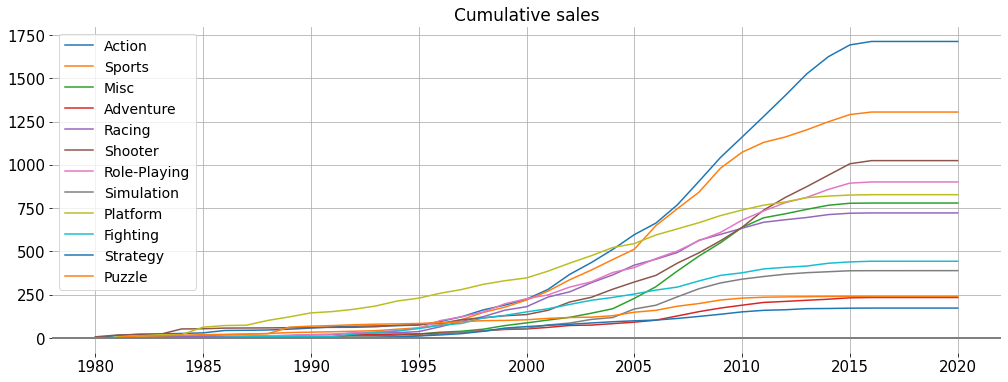

In [41]:
# 전체시장 장르별 누적 판매량 그래프

fig = plt.figure(figsize=(17,6)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

for i in range(0,12):
    gen = ge[i]
    y_cumsum = y_bass.loc[y_bass['Genre'] == gen].groupby(['Year']).sum().cumsum()
    plt.plot(y_cumsum , label= '{}'.format(gen))

plt.legend(fontsize=14)   # 범례 표시
plt.title("Cumulative sales",fontsize=17) ## 타이틀 설정

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

# plt.text(*, 1, 'asdfas')

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)

plt.show()

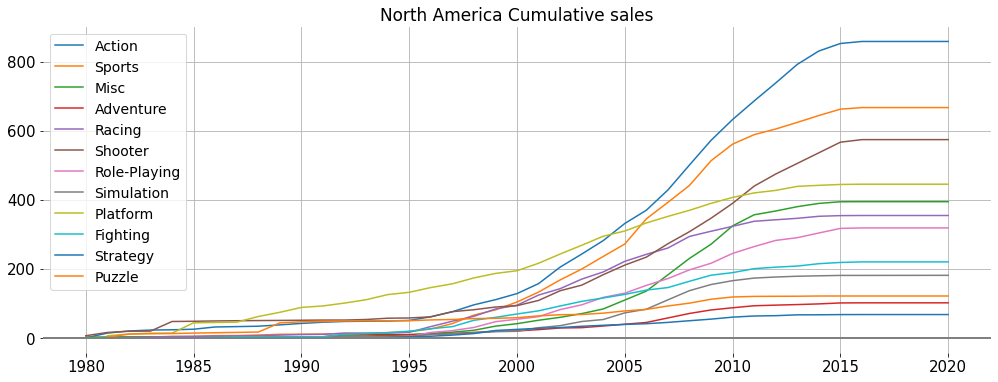

In [42]:
# 북미 장르별 누적 판매량 그래프

fig = plt.figure(figsize=(17,6)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

for i in range(0,12):
    gen = ge[i]
    y_na_cumsum = y_bass_na.loc[y_bass_na['Genre'] == gen].groupby(['Year']).sum().cumsum()
    plt.plot(y_na_cumsum , label= '{}'.format(gen))

plt.legend(fontsize=14)   # 범례 표시
plt.title("North America Cumulative sales",fontsize=17) ## 타이틀 설정

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

# plt.text(*, 1, 'asdfas')

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)

plt.show()

In [43]:
 # NA 장르별 판매 순위
y_bass_na1 = y_bass_na.groupby(['Genre']).sum()
y_bass_na1 = y_bass_na1.drop(columns=['Year' ], axis=1)
y_bass_na1 = y_bass_na1.sort_values(by = 'NA_Sales', axis=0, ascending = False)   # Genre 내림차순 정렬
y_bass_na1

,NA_Sales
Genre,
Action,858.75
Sports,667.26
Shooter,574.48
Platform,445.38
Misc,394.73
Racing,354.70
Role-Playing,318.76
Fighting,220.35
Simulation,181.43


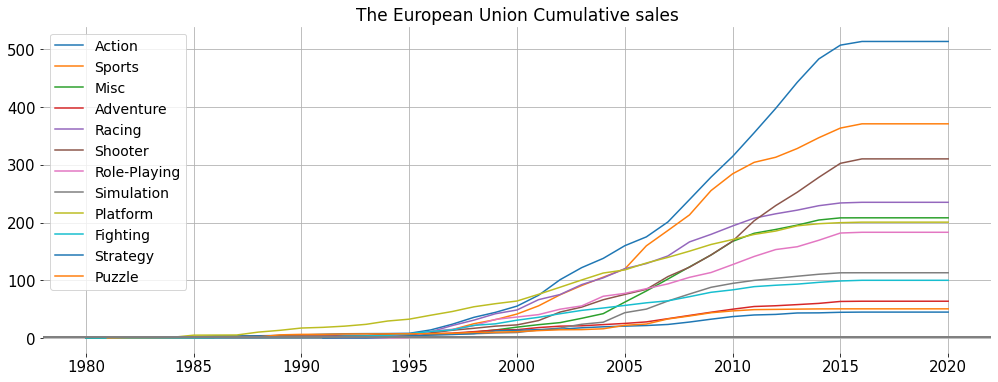

In [44]:
# EU 장르별 누적 판매량 그래프

fig = plt.figure(figsize=(17,6)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

for i in range(0,12):
    gen = ge[i]
    y_eu_cumsum = y_bass_eu.loc[y_bass_na['Genre'] == gen].groupby(['Year']).sum().cumsum()
    plt.plot(y_eu_cumsum , label= '{}'.format(gen))

plt.legend(fontsize=14)   # 범례 표시
plt.title("The European Union Cumulative sales",fontsize=17) ## 타이틀 설정

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

# plt.text(*, 1, 'asdfas')

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)

plt.show()

In [45]:
# EU 장르별 판매 순위
y_bass_eu1 = y_bass_eu.groupby(['Genre']).sum()
y_bass_eu1 = y_bass_eu1.drop(columns=['Year' ], axis=1)
y_bass_eu1 = y_bass_eu1.sort_values(by = 'EU_Sales', axis=0, ascending = False)   # Genre 내림차순 정렬
y_bass_eu1

,EU_Sales
Genre,
Action,513.64
Sports,370.97
Shooter,310.23
Racing,235.02
Misc,208.15
Platform,200.63
Role-Playing,183.09
Simulation,112.99
Fighting,99.90


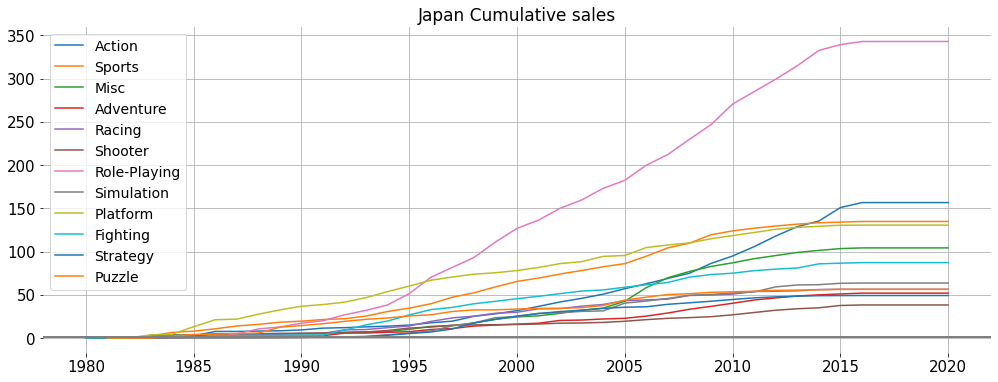

In [46]:
# JP 장르별 누적 판매량 그래프

fig = plt.figure(figsize=(17,6)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

for i in range(0,12):
    gen = ge[i]
    y_jp_cumsum = y_bass_jp.loc[y_bass_jp['Genre'] == gen].groupby(['Year']).sum().cumsum()
    plt.plot(y_jp_cumsum , label= '{}'.format(gen))

plt.legend(fontsize=14)   # 범례 표시
plt.title("Japan Cumulative sales",fontsize=17) ## 타이틀 설정

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

# plt.text(*, 1, 'asdfas')

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)

plt.show()

In [47]:
# JP 장르별 판매 순위
y_bass_jp1 = y_bass_jp.groupby(['Genre']).sum()
y_bass_jp1 = y_bass_jp1.drop(columns=['Year' ], axis=1)
y_bass_jp1 = y_bass_jp1.sort_values(by = 'JP_Sales', axis=0, ascending = False)   # Genre 내림차순 정렬
y_bass_jp1

,JP_Sales
Genre,
Role-Playing,342.93
Action,156.60
Sports,134.76
Platform,130.53
Misc,104.18
Fighting,87.14
Simulation,63.54
Racing,56.32
Puzzle,56.24


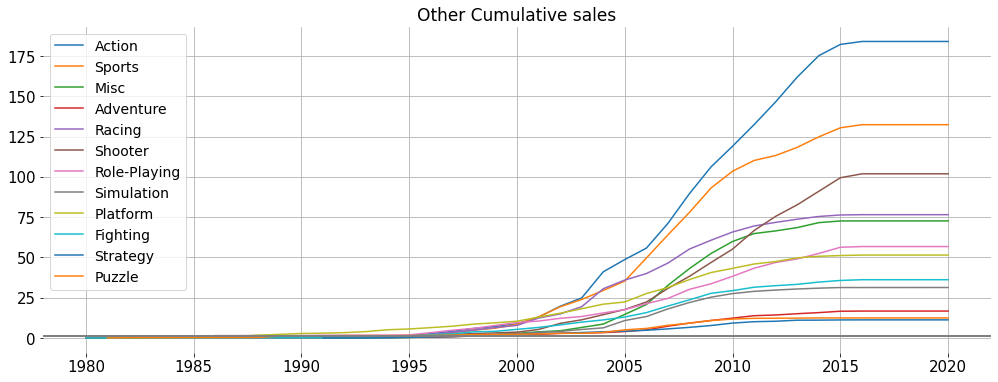

In [48]:
# Other 장르별 누적 판매량 그래프

fig = plt.figure(figsize=(17,6)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

for i in range(0,12):
    gen = ge[i]
    y_other_cumsum = y_bass_other.loc[y_bass_other['Genre'] == gen].groupby(['Year']).sum().cumsum()
    plt.plot(y_other_cumsum , label= '{}'.format(gen))

plt.legend(fontsize=14)   # 범례 표시
plt.title("Other Cumulative sales",fontsize=17) ## 타이틀 설정

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

# plt.text(*, 1, 'asdfas')

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)

plt.show()

In [49]:
# Other 장르별 판매 순위
y_bass_other1 = y_bass_other.groupby(['Genre']).sum()
y_bass_other1 = y_bass_other1.drop(columns=['Year' ], axis=1)
y_bass_other1 = y_bass_other1.sort_values(by = 'Other_Sales', axis=0, ascending = False)   # Genre 내림차순 정렬
y_bass_other1

,Other_Sales
Genre,
Action,183.99
Sports,132.35
Shooter,101.86
Racing,76.51
Misc,72.64
Role-Playing,56.73
Platform,51.45
Fighting,36.15
Simulation,31.32


---
---
---

In [50]:
# NA 최대 흥행작 순위
df_na1 = df.sort_values(by = 'NA_Sales', axis=0, ascending = False)
df_na1.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31


In [51]:
# 2010년 이후 NA 최대 흥행작 순위
df_na2 = df_na1[df_na1['Year'] >= 2010]
df_na2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67
6248,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38
2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32
6393,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12


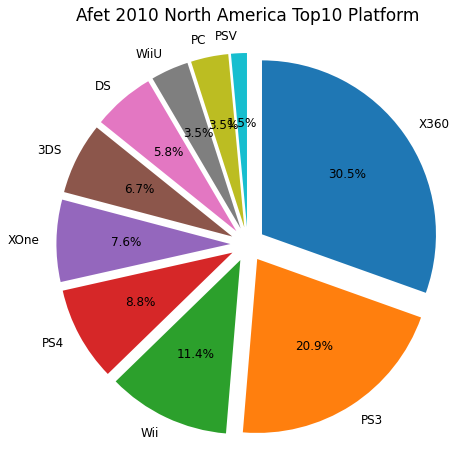

In [52]:
# 2010년 이후 NA 플랫폼별 판매량
p1 = df_na2.groupby(['Platform']).sum().sort_values(by = 'NA_Sales', axis=0, ascending = False).head(10)
p1 = p1.drop(columns=['Year', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

labels = p1.index
# 플랫폼 별 비중
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.figure(figsize=(8,8)).set_facecolor('white')   # 그래프 크기 , 배경 색
plt.rc('font', size=12)     # 폰트 사이즈
plt.pie(np.array(p1).ravel(), labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode = explode);
plt.title("Afet 2010 North America Top10 Platform",fontsize=17)
plt.show();
# 상위 10개의 플랫폼이 labels = plf1.index

---
---
---

In [53]:
# EU 최대 흥행작 순위
df_eu1 = df.sort_values(by = 'EU_Sales', axis=0, ascending = False)
df_eu1.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
11137,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14


In [54]:
# 2010년 이후 EU 최대 흥행작 순위
df_eu2 = df_eu1[df_eu1['Year'] >= 2010]
df_eu2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
2639,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52
14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02


---
---
---

In [55]:
# JP 최대 흥행작 순위
df_jp1 = df.sort_values(by = 'JP_Sales', axis=0, ascending = False)
df_jp1.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
9416,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90
10555,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37


In [56]:
# 2010년 이후 JP 최대 흥행작 순위
df_jp2 = df_jp1[df_jp1['Year'] >= 2010]
df_jp2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82
1847,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00
8906,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2.01,2.32,4.36,0.41
15674,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,0.00,0.00,3.44,0.00
12966,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,Nintendo,0.03,0.00,3.18,0.00


---
---
---

In [57]:
# Other 최대 흥행작 순위
df_ot1 = df.sort_values(by = 'Other_Sales', axis=0, ascending = False)
df_ot1.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
14665,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31


In [58]:
# 2010년 이후 Other 최대 흥행작 순위
df_ot2 = df_ot1[df_ot1['Year'] >= 2010]
df_ot2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31
6216,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02


---
---
---

In [59]:
# platform 명 리스트
pl_name = pd.DataFrame(df['Platform'].value_counts())  # Platform 카운트
pl_name = pl_name.reset_index()   # index 새로 지정 
pl = pl_name['index']   # index 추출

In [60]:
# 연도 / 플랫폼 / 지역 1개 (연도별 / 플랫폼별 누적 판매를 위한)
p_bass_na = df.drop(columns=['Name', 'Genre', 'Publisher','EU_Sales' ,'JP_Sales', 'Other_Sales' ], axis=1)
p_bass_eu = df.drop(columns=['Name', 'Genre', 'Publisher','NA_Sales' ,'JP_Sales', 'Other_Sales' ], axis=1)
p_bass_jp = df.drop(columns=['Name', 'Genre', 'Publisher','NA_Sales' ,'EU_Sales', 'Other_Sales' ], axis=1)
p_bass_other = df.drop(columns=['Name', 'Genre', 'Publisher','NA_Sales' ,'JP_Sales', 'EU_Sales' ], axis=1)


In [61]:
for i in range(0,31):   # 그래프 끝을 맞추기 위한 보정 (2020 에 0 데이터 추가)
    plf = pl[i]
    p_bass_na = p_bass_na.append({'Year' : 2020 , 'Platform' : plf, 'NA_Sales' : 0} , ignore_index=True)
    p_bass_eu = p_bass_eu.append({'Year' : 2020 , 'Platform' : plf, 'EU_Sales' : 0} , ignore_index=True)
    p_bass_jp = p_bass_jp.append({'Year' : 2020 , 'Platform' : plf, 'JP_Sales' : 0} , ignore_index=True)
    p_bass_other = p_bass_other.append({'Year' : 2020 , 'Platform' : plf, 'Other_Sales' : 0} , ignore_index=True)

    # 앞 0 추가
    p_bass_na = p_bass_na.append({'Year' : 1980 , 'Platform' : plf, 'NA_Sales' : 0} , ignore_index=True)
    p_bass_eu = p_bass_eu.append({'Year' : 1980 , 'Platform' : plf, 'EU_Sales' : 0} , ignore_index=True)
    p_bass_jp = p_bass_jp.append({'Year' : 1980 , 'Platform' : plf, 'JP_Sales' : 0} , ignore_index=True)
    p_bass_other = p_bass_other.append({'Year' : 1980 , 'Platform' : plf, 'Other_Sales' : 0} , ignore_index=True)


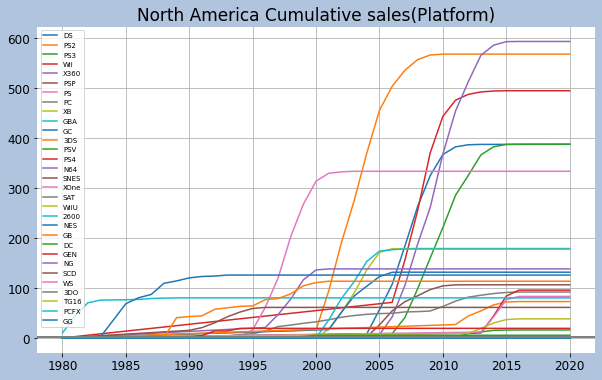

In [62]:
# 북미 플랫폼별 누적 판매량 그래프

fig1 = plt.figure(figsize=(10,6)) ## 캔버스 생성
fig1.set_facecolor('lightsteelblue') ## 캔버스 색상 설정
ax = fig1.add_subplot() ## 그림 뼈대(프레임) 생성

for i in range(0,31):
    plf = pl[i]
    p_na_cumsum = p_bass_na.loc[p_bass_na['Platform'] == plf].groupby(['Year']).sum().cumsum()
    plt.plot(p_na_cumsum , label= '{}'.format(plf))

plt.legend(fontsize=7)   # 범례 표시
plt.title("North America Cumulative sales(Platform)",fontsize=17) ## 타이틀 설정

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

# plt.text(*, 1, 'asdfas')

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)

plt.show()

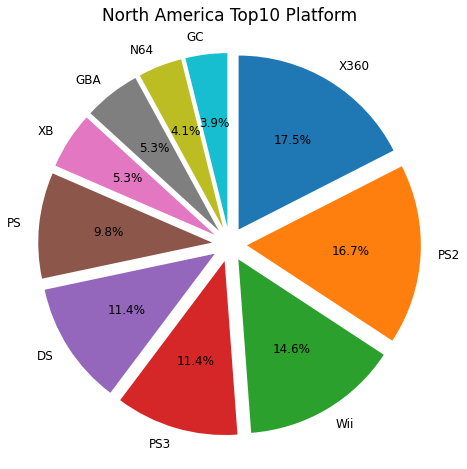

In [63]:
# NA 플랫폼별 판매량
p1 = p_bass_na.groupby(['Platform']).sum().sort_values(by = 'NA_Sales', axis=0, ascending = False).head(10)
p1 = p1.drop(columns=['Year'], axis=1)

labels = p1.index
# 플랫폼 별 비중
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.figure(figsize=(8,8)).set_facecolor('white')   # 그래프 크기 , 배경 색
plt.rc('font', size=12)     # 폰트 사이즈
plt.pie(np.array(p1).ravel(), labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode = explode);
plt.title("North America Top10 Platform",fontsize=17)
plt.show();
# 상위 10개의 플랫폼이 labels = plf1.index

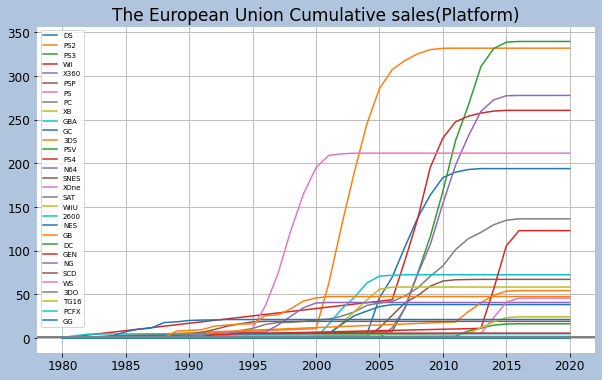

In [64]:
# 유럽 플랫폼별 누적 판매량 그래프

fig1 = plt.figure(figsize=(10,6)) ## 캔버스 생성
fig1.set_facecolor('lightsteelblue') ## 캔버스 색상 설정
ax = fig1.add_subplot() ## 그림 뼈대(프레임) 생성

for i in range(0,31):
    plf = pl[i]
    p_eu_cumsum = p_bass_eu.loc[p_bass_eu['Platform'] == plf].groupby(['Year']).sum().cumsum()
    plt.plot(p_eu_cumsum , label= '{}'.format(plf))

plt.legend(fontsize=7)   # 범례 표시
plt.title("The European Union Cumulative sales(Platform)",fontsize=17) ## 타이틀 설정

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

# plt.text(*, 1, 'asdfas')

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)

plt.show()

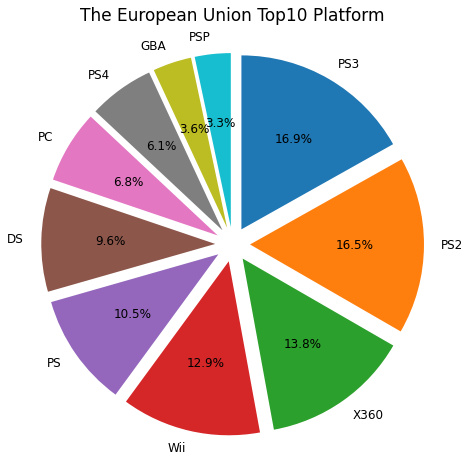

In [65]:
# NA 플랫폼별 판매량
p2 = p_bass_eu.groupby(['Platform']).sum().sort_values(by = 'EU_Sales', axis=0, ascending = False).head(10)
p2 = p2.drop(columns=['Year'], axis=1)

labels = p2.index
# 플랫폼 별 비중
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.figure(figsize=(8,8)).set_facecolor('white')   # 그래프 크기 , 배경 색
plt.rc('font', size=12)     # 폰트 사이즈
plt.pie(np.array(p2).ravel(), labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode = explode);
plt.title("The European Union Top10 Platform",fontsize=17)
plt.show();
# 상위 10개의 플랫폼이 labels = plf1.index

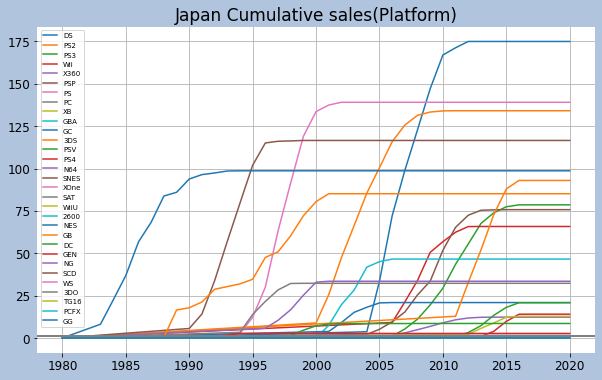

In [66]:
# 일본 플랫폼별 누적 판매량 그래프

fig1 = plt.figure(figsize=(10,6)) ## 캔버스 생성
fig1.set_facecolor('lightsteelblue') ## 캔버스 색상 설정
ax = fig1.add_subplot() ## 그림 뼈대(프레임) 생성

for i in range(0,31):
    plf = pl[i]
    p_jp_cumsum = p_bass_jp.loc[p_bass_jp['Platform'] == plf].groupby(['Year']).sum().cumsum()
    plt.plot(p_jp_cumsum , label= '{}'.format(plf))

plt.legend(fontsize=7)   # 범례 표시
plt.title("Japan Cumulative sales(Platform)",fontsize=17) ## 타이틀 설정

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

# plt.text(*, 1, 'asdfas')

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)

plt.show()

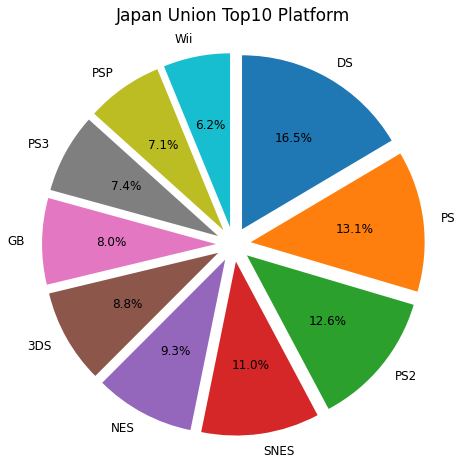

In [67]:
# NA 플랫폼별 판매량
p3 = p_bass_jp.groupby(['Platform']).sum().sort_values(by = 'JP_Sales', axis=0, ascending = False).head(10)
p3 = p3.drop(columns=['Year'], axis=1)

labels = p3.index
# 플랫폼 별 비중
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.figure(figsize=(8,8)).set_facecolor('white')   # 그래프 크기 , 배경 색
plt.rc('font', size=12)     # 폰트 사이즈
plt.pie(np.array(p3).ravel(), labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode = explode);
plt.title("Japan Union Top10 Platform",fontsize=17)
plt.show();
# 상위 10개의 플랫폼이 labels = plf1.index

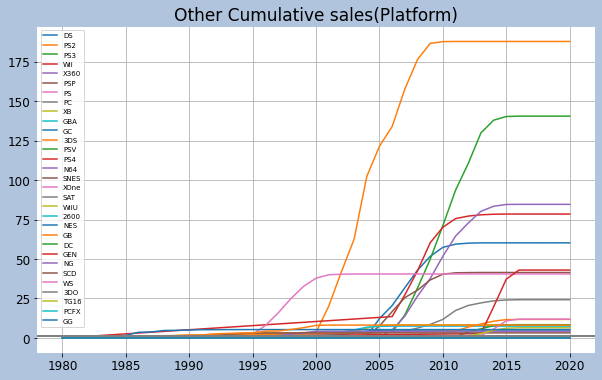

In [68]:
# Other 플랫폼별 누적 판매량 그래프

fig1 = plt.figure(figsize=(10,6)) ## 캔버스 생성
fig1.set_facecolor('lightsteelblue') ## 캔버스 색상 설정
ax = fig1.add_subplot() ## 그림 뼈대(프레임) 생성

for i in range(0,31):
    plf = pl[i]
    p_other_cumsum = p_bass_other.loc[p_bass_other['Platform'] == plf].groupby(['Year']).sum().cumsum()
    plt.plot(p_other_cumsum , label= '{}'.format(plf))

plt.legend(fontsize=7)   # 범례 표시
plt.title("Other Cumulative sales(Platform)",fontsize=17) ## 타이틀 설정

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

# plt.text(*, 1, 'asdfas')

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)

plt.show()

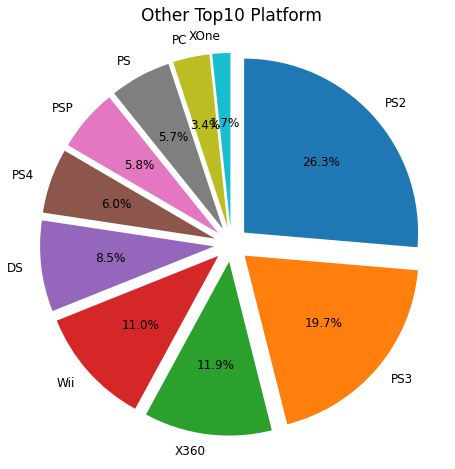

In [69]:
# NA 플랫폼별 판매량
p4 = p_bass_other.groupby(['Platform']).sum().sort_values(by = 'Other_Sales', axis=0, ascending = False).head(10)
p4 = p4.drop(columns=['Year'], axis=1)

labels = p4.index
# 플랫폼 별 비중
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.figure(figsize=(8,8)).set_facecolor('white')   # 그래프 크기 , 배경 색
plt.rc('font', size=12)     # 폰트 사이즈
plt.pie(np.array(p4).ravel(), labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode = explode);
plt.title("Other Top10 Platform",fontsize=17)
plt.show();
# 상위 10개의 플랫폼이 labels = plf1.index